In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
import graphviz

In [215]:
df = pd.read_csv('Data/world_cups.csv')
dfm = pd.read_csv('Data/world_cup_matches.csv')
#Cruzar las tablas
df = df.merge(dfm, left_on='Year', right_on='Year', how='left')
df.head(10)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,ID,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1,1930/7/13,Group stage,France,4,1,Mexico,France,Mexico,NaN,False
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,2,1930/7/13,Group stage,United States,3,0,Belgium,United States,Belgium,NaN,False
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,3,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil,NaN,False
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,4,1930/7/14,Group stage,Romania,3,1,Peru,Romania,Peru,NaN,False
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,5,1930/7/15,Group stage,Argentina,1,0,France,Argentina,France,NaN,False
5,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,6,1930/7/16,Group stage,Chile,3,0,Mexico,Chile,Mexico,NaN,False
6,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,7,1930/7/17,Group stage,Yugoslavia,4,0,Bolivia,Yugoslavia,Bolivia,NaN,False
7,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,8,1930/7/17,Group stage,United States,3,0,Paraguay,United States,Paraguay,NaN,False
8,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,9,1930/7/18,Group stage,Uruguay,1,0,Peru,Uruguay,Peru,NaN,True
9,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,10,1930/7/19,Group stage,Chile,1,0,France,Chile,France,NaN,False


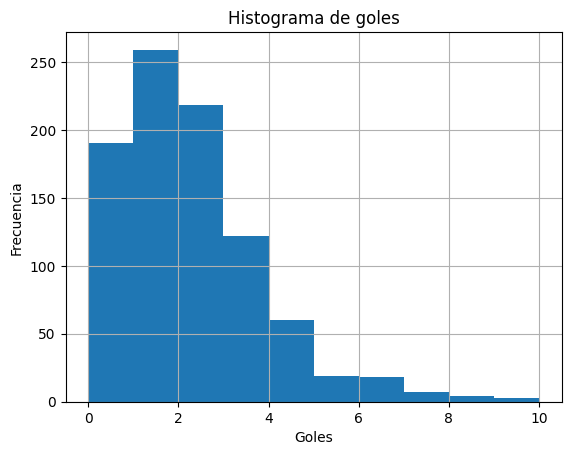

In [216]:
#Histograma de goles de local
df['Home Goals'].hist(bins=10)
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.title('Histograma de goles')
plt.show()



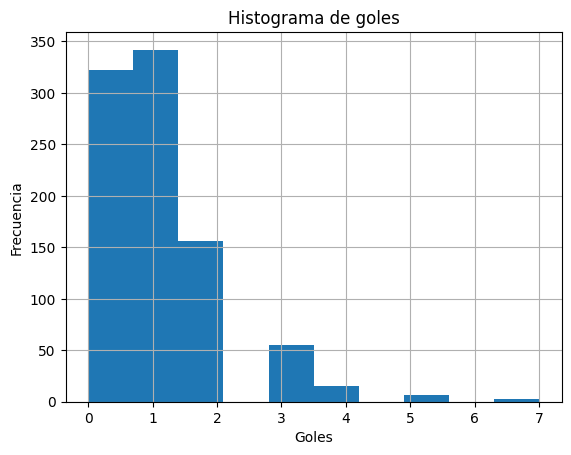

In [217]:
#Histograma de goles de visitante
df['Away Goals'].hist(bins=10)
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.title('Histograma de goles')
plt.show()

<AxesSubplot:>

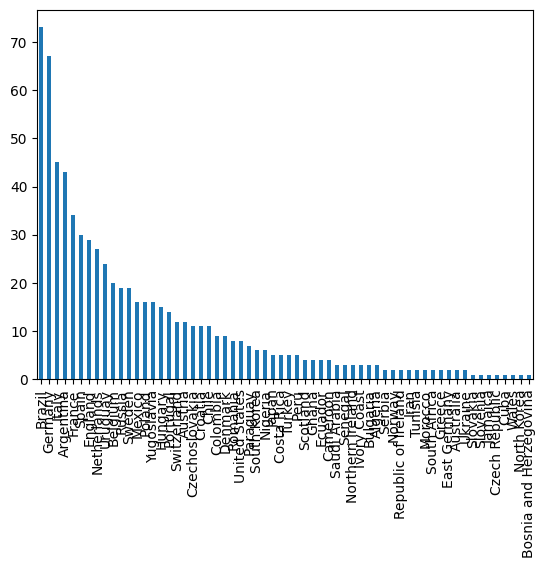

In [218]:
#Diagrama de barras de ganadores en partidos de mundiales
df['Winning Team'].value_counts().plot(kind='bar')

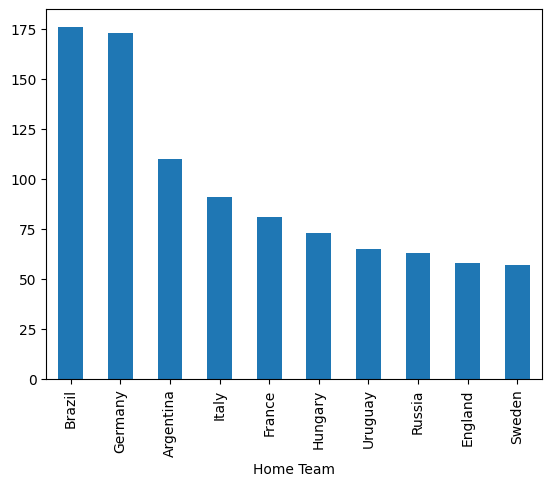

In [219]:
#grafica de los goles por equipo
df.groupby('Home Team')['Home Goals'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.show()

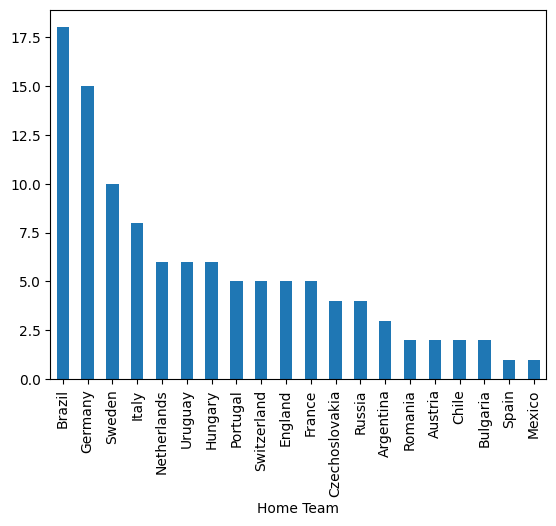

In [220]:
#grafica de los goles en cuartos de final por equipo
df[df['Stage']=='Quarter-finals'].groupby('Home Team')['Home Goals'].sum().sort_values(ascending=False).head(20).plot.bar()
plt.show()

<AxesSubplot:>

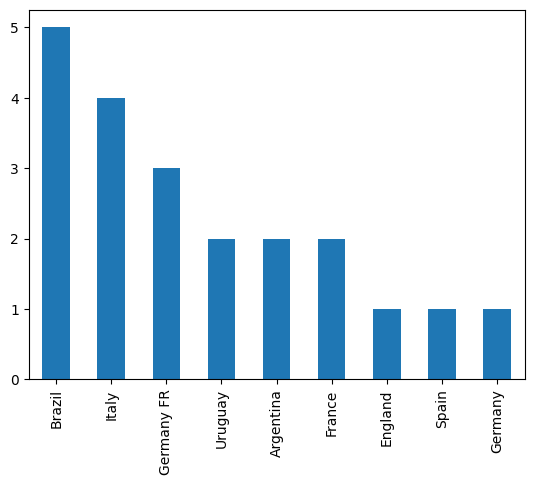

In [221]:
#Diagrama de barras de ganadores de mundiales
df = pd.read_csv('Data/world_cups.csv')
df['Winner'].value_counts().plot(kind='bar')

<AxesSubplot:>

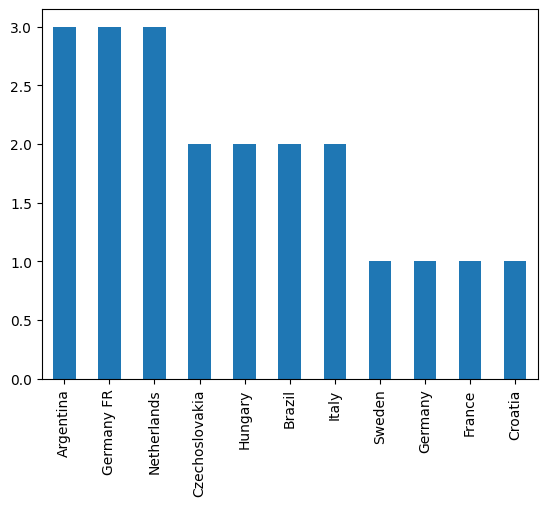

In [222]:
#Diagrama de barras de subcampeones de mundiales
df['Runners-Up'].value_counts().plot(kind='bar')

<AxesSubplot:>

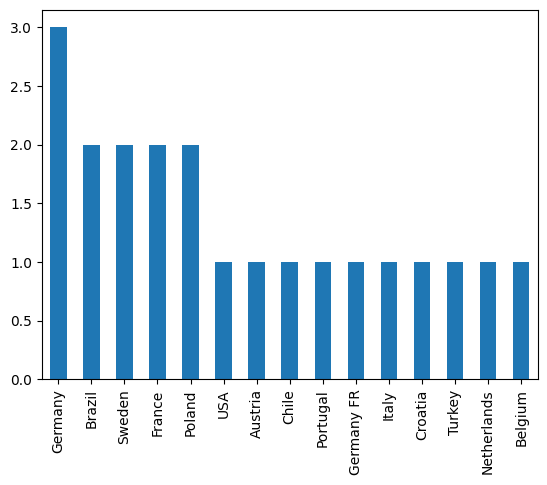

In [223]:
#Diagrama de barras de terceros lugares de mundiales
df['Third'].value_counts().plot(kind='bar')

<AxesSubplot:>

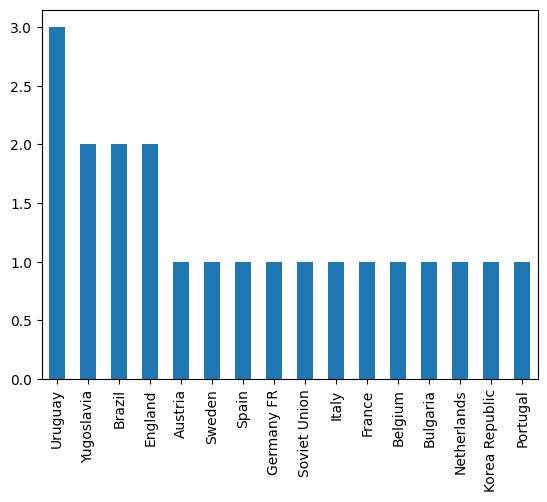

In [224]:
#Diagrama de barras de cuartos lugares de mundiales
df['Fourth'].value_counts().plot(kind='bar')

In [225]:
#Coincidimos en que el cuarto lugar no afecta tanto, puesto que esos países no se ven involucrados en su mayopría como campeones o subcampeones
#Por lo que se puede eliminar esa columna
#También se podrían eliminar los países que menos partidos han ganado en mundiales, puesto que no se ven involucrados en las etapas finales
#De momento se eliminarán los países que menos partidos han ganado en mundiales
#Los goles son un poco ambiguos, puesto que subir de los 2 goles es muy poco probable, por lo que se eliminarán los goles
#Los equipos visitantes suelen estar ahí en vista de la clasificación del futbol de peor contra mejor
#Por lo que se ve que hacen menos goles, no tienen mucha relevancia
#Sin embargo, no eliminamos goles porque se ve que los equipos que más goles anotan, suelen ganar más mundiales, tales cómo Brasil

In [226]:
df = pd.read_csv('Data/world_cups.csv')
dfm = pd.read_csv('Data/world_cup_matches.csv')
#Cruzar las tablas
df = df.merge(dfm, left_on='Year', right_on='Year', how='left')

In [227]:
del df['Win Conditions']
del df['Host Team']
df.head(5)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,ID,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1,1930/7/13,Group stage,France,4,1,Mexico,France,Mexico
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,2,1930/7/13,Group stage,United States,3,0,Belgium,United States,Belgium
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,3,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,4,1930/7/14,Group stage,Romania,3,1,Peru,Romania,Peru
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,5,1930/7/15,Group stage,Argentina,1,0,France,Argentina,France


In [228]:
#poner la fecha como el dia de la semana y pasarlo a numero
#quitar el cuarto
#label encoder pa lo de la semana
#label encoder pa la stage
#one hot encoder pa el resto
#cambiar lo de ganar por 1 y perder por 0 y empate por 0.5

In [229]:
def determinar_resultado(row):
    if row['Winning Team'] == row['Away Team']:
        return 0
    elif row['Winning Team'] == row['Home Team']:
        return 1
    else:
        return 0.5

In [230]:
df['Result'] = df.apply(determinar_resultado, axis=1)


In [231]:
del df['Winning Team']


In [232]:
del df['Losing Team']


In [233]:
del df['ID']

In [234]:
df.head(10)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/13,Group stage,France,4,1,Mexico,1.0
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/13,Group stage,United States,3,0,Belgium,1.0
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/14,Group stage,Romania,3,1,Peru,1.0
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/15,Group stage,Argentina,1,0,France,1.0
5,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/16,Group stage,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/17,Group stage,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/17,Group stage,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/18,Group stage,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/19,Group stage,Chile,1,0,France,1.0


In [235]:
del df['Host Country']

In [236]:
del df['Fourth']

In [237]:
def sustituirDia(row):
    # Convierte la cadena en un objeto datetime
    fecha_obj = datetime.strptime(row['Date'], "%Y/%m/%d")

    # Obtiene el nombre del día de la semana
    return fecha_obj.strftime("%A")

In [238]:
df['Date'] = df.apply(sustituirDia, axis=1)

In [239]:
df.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Argentina,USA,70,13,18,Sunday,Group stage,France,4,1,Mexico,1.0
1,1930,Uruguay,Argentina,USA,70,13,18,Sunday,Group stage,United States,3,0,Belgium,1.0
2,1930,Uruguay,Argentina,USA,70,13,18,Monday,Group stage,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Argentina,USA,70,13,18,Monday,Group stage,Romania,3,1,Peru,1.0
4,1930,Uruguay,Argentina,USA,70,13,18,Tuesday,Group stage,Argentina,1,0,France,1.0
5,1930,Uruguay,Argentina,USA,70,13,18,Wednesday,Group stage,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Argentina,USA,70,13,18,Thursday,Group stage,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Argentina,USA,70,13,18,Thursday,Group stage,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Argentina,USA,70,13,18,Friday,Group stage,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Argentina,USA,70,13,18,Saturday,Group stage,Chile,1,0,France,1.0


In [240]:

# Label encoder
week_days = {
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday': 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}


In [241]:
def sustituirDia(row):
    return week_days[row['Date']]

In [242]:
df['Date'] = df.apply(sustituirDia, axis=1)
df.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Argentina,USA,70,13,18,6,Group stage,France,4,1,Mexico,1.0
1,1930,Uruguay,Argentina,USA,70,13,18,6,Group stage,United States,3,0,Belgium,1.0
2,1930,Uruguay,Argentina,USA,70,13,18,0,Group stage,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Argentina,USA,70,13,18,0,Group stage,Romania,3,1,Peru,1.0
4,1930,Uruguay,Argentina,USA,70,13,18,1,Group stage,Argentina,1,0,France,1.0
5,1930,Uruguay,Argentina,USA,70,13,18,2,Group stage,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Argentina,USA,70,13,18,3,Group stage,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Argentina,USA,70,13,18,3,Group stage,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Argentina,USA,70,13,18,4,Group stage,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Argentina,USA,70,13,18,5,Group stage,Chile,1,0,France,1.0


In [243]:
def equivalenciaStage(row):
    if(row['Stage'] == 'First group stage' or row['Stage'] == 'First round'):
        return 'Group stage'
    elif(row['Stage'] == 'Second group stage' or row['Stage'] == 'Final round'):
        return 'Round of 16'
    else:
        return row['Stage']

In [244]:
df['Stage'] = df.apply(equivalenciaStage, axis=1)

In [245]:
stages = {
    'Group stage' : 0,
    'Round of 16' : 1,
    'Quarter-finals' : 2,
    'Semi-finals' : 3,
    'Third place' : 4,
    'Final' : 5
}
def sustituirStage(row):
    return stages[row['Stage']]

In [246]:
df['Stage'] = df.apply(sustituirStage, axis=1)

In [247]:
df.tail(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
890,2018,France,Croatia,Belgium,169,32,64,1,1,Sweden,1,0,Switzerland,1.0
891,2018,France,Croatia,Belgium,169,32,64,1,1,Colombia,1,1,England,0.5
892,2018,France,Croatia,Belgium,169,32,64,4,2,Uruguay,0,2,France,0.0
893,2018,France,Croatia,Belgium,169,32,64,4,2,Brazil,1,2,Belgium,0.0
894,2018,France,Croatia,Belgium,169,32,64,5,2,Sweden,0,2,England,0.0
895,2018,France,Croatia,Belgium,169,32,64,5,2,Russia,2,2,Croatia,0.5
896,2018,France,Croatia,Belgium,169,32,64,1,3,France,1,0,Belgium,1.0
897,2018,France,Croatia,Belgium,169,32,64,2,3,Croatia,2,1,England,1.0
898,2018,France,Croatia,Belgium,169,32,64,5,4,Belgium,2,0,England,1.0
899,2018,France,Croatia,Belgium,169,32,64,6,5,France,4,2,Croatia,1.0


In [248]:
df_encoded = pd.get_dummies(df, columns=['Runners-Up', 'Third', 'Home Team', 'Away Team'])
#df_encoded["Winner"] = LabelEncoder().fit_transform(df_encoded["Winner"])

In [249]:
df_encoded.head(10)

,Year,Winner,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Goals,Away Goals,Result,...,Away Team_Togo,Away Team_Trinidad and Tobago,Away Team_Tunisia,Away Team_Turkey,Away Team_Ukraine,Away Team_United Arab Emirates,Away Team_United States,Away Team_Uruguay,Away Team_Wales,Away Team_Yugoslavia
0,1930,Uruguay,70,13,18,6,0,4,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1930,Uruguay,70,13,18,6,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1930,Uruguay,70,13,18,0,0,2,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1930,Uruguay,70,13,18,0,0,3,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1930,Uruguay,70,13,18,1,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,1930,Uruguay,70,13,18,2,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,1930,Uruguay,70,13,18,3,0,4,0,1.0,...,0,0,0,0,0,0,0,0,0,0
7,1930,Uruguay,70,13,18,3,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,1930,Uruguay,70,13,18,4,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
9,1930,Uruguay,70,13,18,5,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0


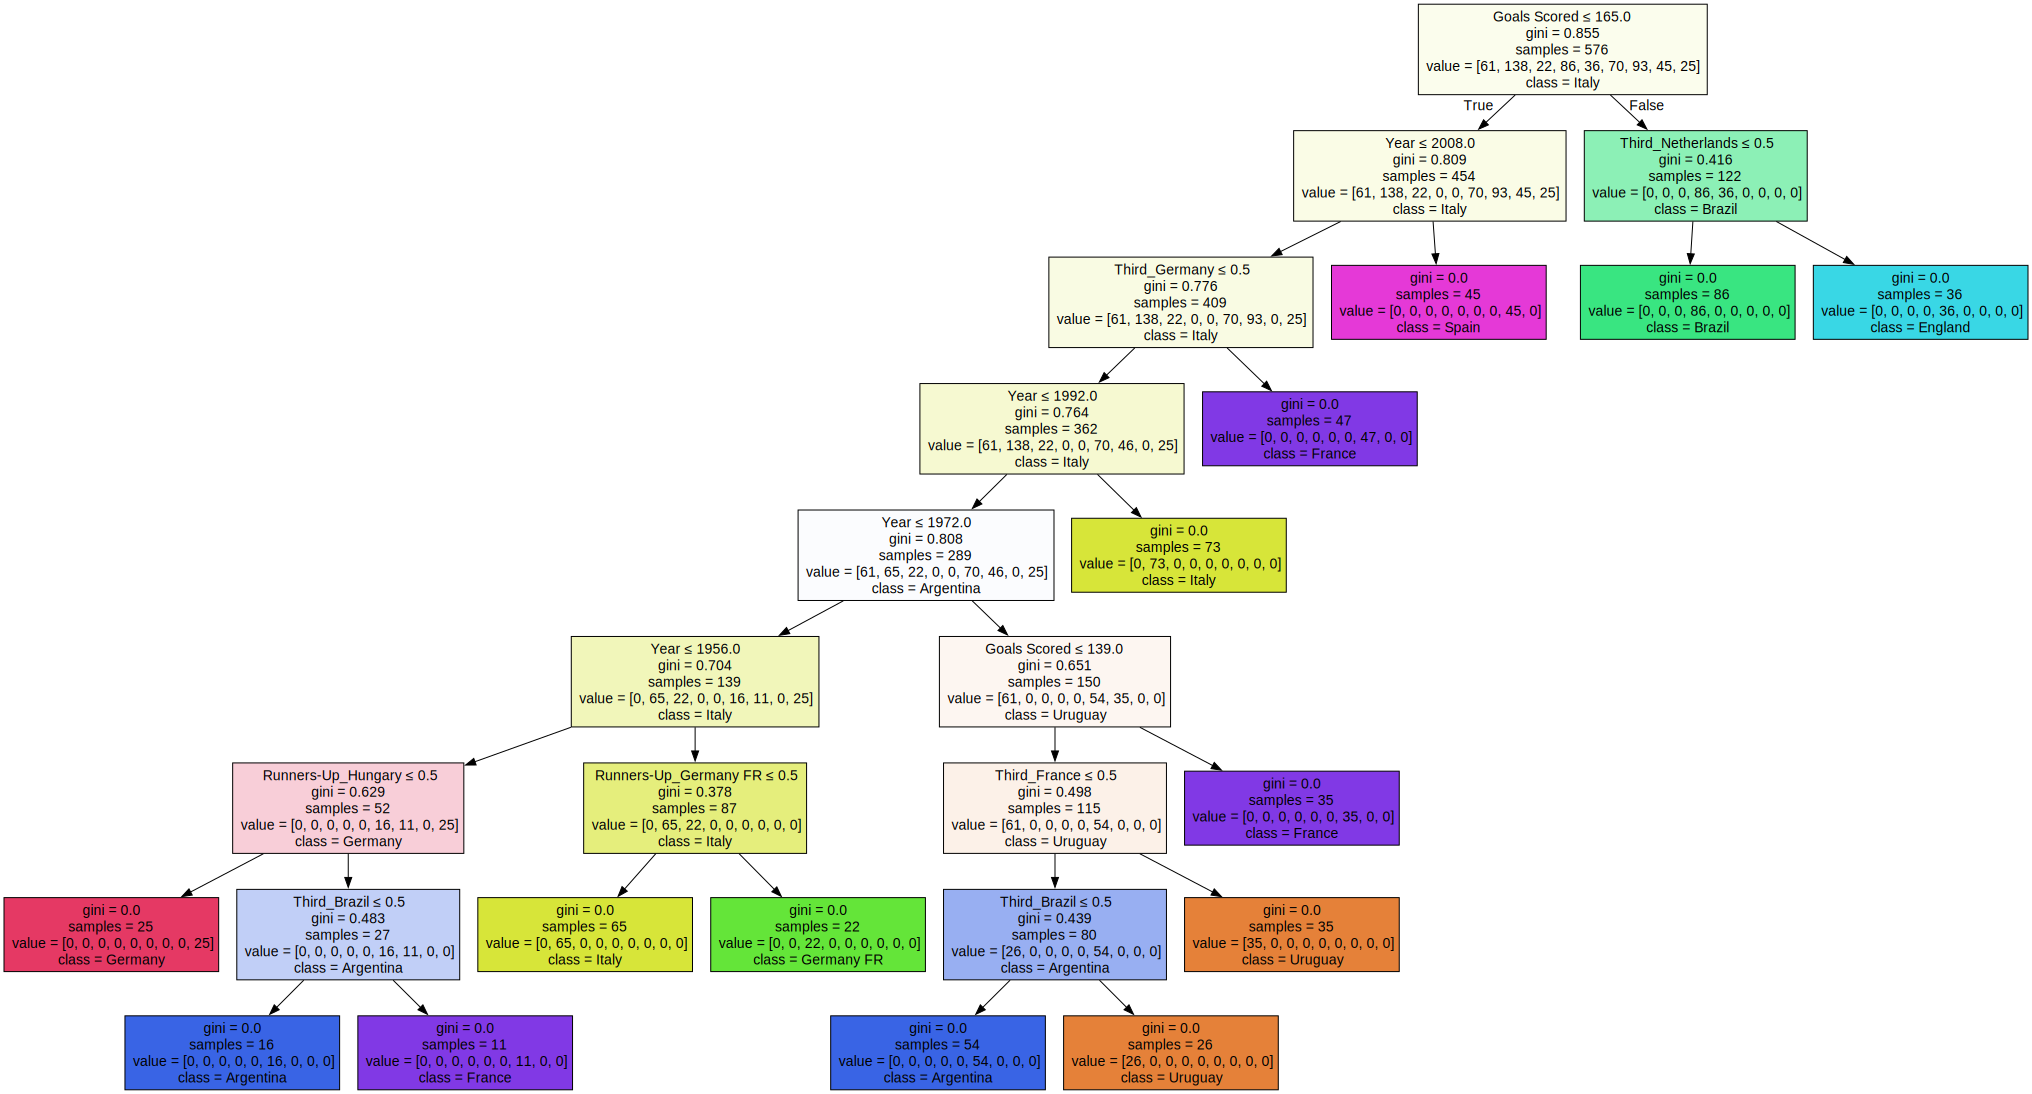

In [250]:

clf = DecisionTreeClassifier(max_depth=8)
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(['Winner'], axis=1), df_encoded['Winner'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
clf = clf.fit(X_train, y_train)

dot_data = export_graphviz(
    clf, out_file=None,
    feature_names=df_encoded.drop(['Winner'],
    axis=1).columns, 
    filled=True, 
    special_characters=True,
    class_names=df_encoded['Winner'].unique().astype(str)
)
graph = graphviz.Source(dot_data)
graph.render(filename = "world_cup.dot")
graph


In [251]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(['Winner'], axis=1), df_encoded['Winner'], test_size=0.2, random_state=42)

# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 8, 12]
}

# Realizar una búsqueda de hiperparámetros con validación cruzada
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_clf = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred = best_clf.predict(X_test)
print("Mejor modelo - Precisión: ", accuracy_score(y_test, y_pred))

   


Mejor modelo - Precisión:  1.0


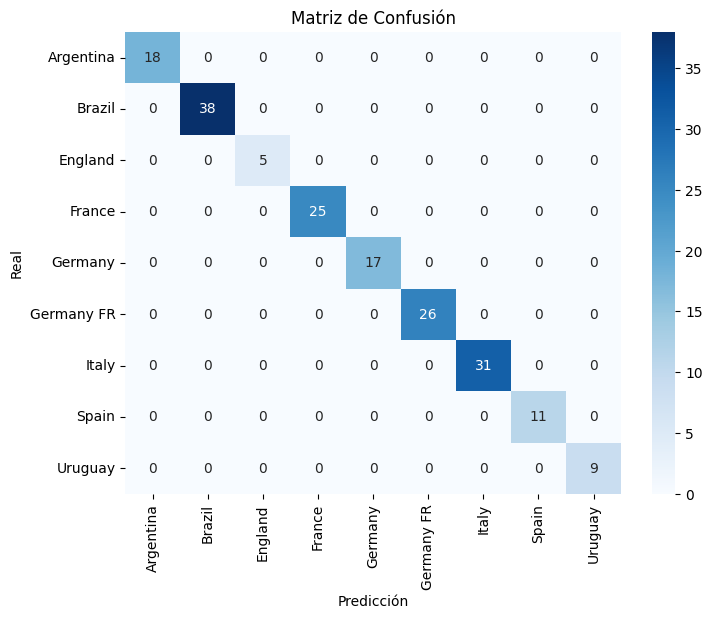

In [252]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor (heatmap) de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [253]:
df_encoded.head(10)

,Year,Winner,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Goals,Away Goals,Result,...,Away Team_Togo,Away Team_Trinidad and Tobago,Away Team_Tunisia,Away Team_Turkey,Away Team_Ukraine,Away Team_United Arab Emirates,Away Team_United States,Away Team_Uruguay,Away Team_Wales,Away Team_Yugoslavia
0,1930,Uruguay,70,13,18,6,0,4,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1930,Uruguay,70,13,18,6,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1930,Uruguay,70,13,18,0,0,2,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1930,Uruguay,70,13,18,0,0,3,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1930,Uruguay,70,13,18,1,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,1930,Uruguay,70,13,18,2,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,1930,Uruguay,70,13,18,3,0,4,0,1.0,...,0,0,0,0,0,0,0,0,0,0
7,1930,Uruguay,70,13,18,3,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,1930,Uruguay,70,13,18,4,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
9,1930,Uruguay,70,13,18,5,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
from sklearn_extra.cluster import KMedoids
df_encoded["Winner"] = LabelEncoder().fit_transform(df_encoded["Winner"])

# Supongamos que tienes un DataFrame df con tus datos
X = df_encoded.values  # Convierte tus datos a un arreglo NumPy

# Crea un modelo K-Medoids con el número de clusters deseado (n_clusters)
n_clusters = 9  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)

     Year      Winner   Runners-Up        Third  Goals Scored  \
819  2014     Germany    Argentina  Netherlands           171   
315  1982       Italy   Germany FR       Poland           146   
379  1986   Argentina   Germany FR       France           132   
367  1986   Argentina   Germany FR       France           132   
446  1990  Germany FR    Argentina        Italy           115   
176  1966     England   Germany FR     Portugal            89   
318  1982       Italy   Germany FR       Poland           146   
481  1994      Brazil        Italy       Sweden           141   
708  2010       Spain  Netherlands      Germany           145   

     Qualified Teams  Matches Played  Date  Stage            Home Team  \
819               32              64     3      0              Algeria   
315               24              52     2      0              England   
379               24              52     5      0               Mexico   
367               24              52     1      0    

c:\Users\juana\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\juana\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


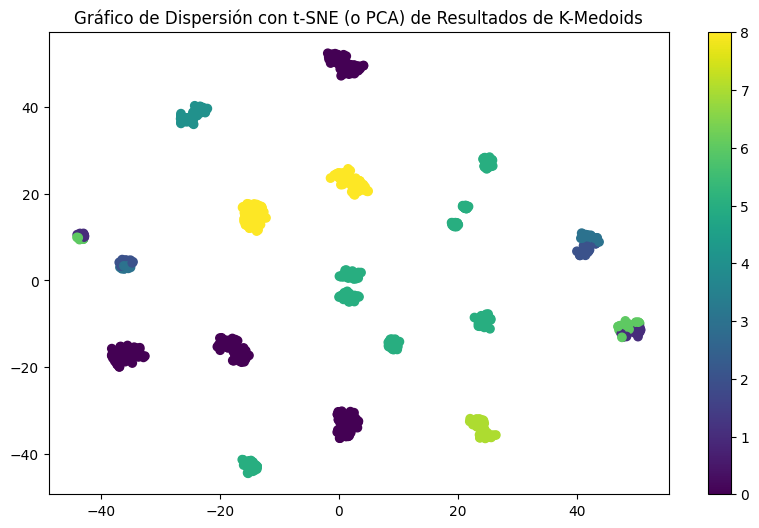

In [259]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Reduce la dimensionalidad con t-SNE o PCA
# Puedes elegir entre t-SNE o PCA, según tus preferencias
reducer = TSNE(n_components=2, random_state=0)
# O también podrías usar PCA:
# reducer = PCA(n_components=2, random_state=0)

X_reduced = reducer.fit_transform(X)

# Supongamos que 'labels' contiene las etiquetas de cluster asignadas por K-Medoids
labels = kmedoids.labels_

# Crea un gráfico de dispersión y colorea los puntos según las etiquetas de cluster
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.title('Gráfico de Dispersión con t-SNE (o PCA) de Resultados de K-Medoids')
plt.show()


In [260]:
from sklearn.metrics import silhouette_score

# Calcula el coeficiente de silueta para tus datos y etiquetas
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)


Coeficiente de Silueta promedio: 0.43999005203069447


In [261]:
n_clusters = 3  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year  Winner Runners-Up       Third  Goals Scored  Qualified Teams  \
221  1970  Brazil      Italy  Germany FR            95               16   
581  2002  Brazil    Germany      Turkey           161               32   
596  2002  Brazil    Germany      Turkey           161               32   

     Matches Played  Date  Stage            Home Team  Home Goals  Away Goals  \
221              32     3      0             Bulgaria           1           1   
581              64     5      0  Republic of Ireland           1           1   
596              64     2      0              Germany           1           1   

               Away Team  Result  
221              Morocco     0.5  
581             Cameroon     0.5  
596  Republic of Ireland     0.5  
Coeficiente de Silueta promedio: 0.21267091052066436


In [262]:
n_clusters = 20  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner   Runners-Up        Third  Goals Scored  \
387  1986   Argentina   Germany FR       France           132   
446  1990  Germany FR    Argentina        Italy           115   
708  2010       Spain  Netherlands      Germany           145   
480  1994      Brazil        Italy       Sweden           141   
464  1994      Brazil        Italy       Sweden           141   
802  2014     Germany    Argentina  Netherlands           171   
685  2006       Italy       France      Germany           147   
176  1966     England   Germany FR     Portugal            89   
339  1982       Italy   Germany FR       Poland           146   
498  1994      Brazil        Italy       Sweden           141   
116  1958      Brazil       Sweden       France           126   
788  2014     Germany    Argentina  Netherlands           171   
379  1986   Argentina   Germany FR       France           132   
820  2014     Germany    Argentina  Netherlands           171   
485  1994      Brazil    

In [263]:
n_clusters = 15  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner   Runners-Up        Third  Goals Scored  \
820  2014     Germany    Argentina  Netherlands           171   
478  1994      Brazil        Italy       Sweden           141   
379  1986   Argentina   Germany FR       France           132   
708  2010       Spain  Netherlands      Germany           145   
367  1986   Argentina   Germany FR       France           132   
788  2014     Germany    Argentina  Netherlands           171   
488  1994      Brazil        Italy       Sweden           141   
446  1990  Germany FR    Argentina        Italy           115   
339  1982       Italy   Germany FR       Poland           146   
464  1994      Brazil        Italy       Sweden           141   
176  1966     England   Germany FR     Portugal            89   
503  1994      Brazil        Italy       Sweden           141   
494  1994      Brazil        Italy       Sweden           141   
506  1994      Brazil        Italy       Sweden           141   
685  2006       Italy    

In [264]:
n_clusters = 18  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner   Runners-Up     Third  Goals Scored  Qualified Teams  \
387  1986   Argentina   Germany FR    France           132               24   
446  1990  Germany FR    Argentina     Italy           115               24   
708  2010       Spain  Netherlands   Germany           145               32   
480  1994      Brazil        Italy    Sweden           141               24   
464  1994      Brazil        Italy    Sweden           141               24   
856  2018      France      Croatia   Belgium           169               32   
536  1998      France       Brazil   Croatia           171               32   
176  1966     England   Germany FR  Portugal            89               16   
339  1982       Italy   Germany FR    Poland           146               24   
498  1994      Brazil        Italy    Sweden           141               24   
116  1958      Brazil       Sweden    France           126               16   
597  2002      Brazil      Germany    Turkey        

In [265]:
n_clusters = 17  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner   Runners-Up        Third  Goals Scored  \
473  1994      Brazil        Italy       Sweden           141   
446  1990  Germany FR    Argentina        Italy           115   
708  2010       Spain  Netherlands      Germany           145   
480  1994      Brazil        Italy       Sweden           141   
464  1994      Brazil        Italy       Sweden           141   
819  2014     Germany    Argentina  Netherlands           171   
536  1998      France       Brazil      Croatia           171   
176  1966     England   Germany FR     Portugal            89   
339  1982       Italy   Germany FR       Poland           146   
498  1994      Brazil        Italy       Sweden           141   
116  1958      Brazil       Sweden       France           126   
685  2006       Italy       France      Germany           147   
379  1986   Argentina   Germany FR       France           132   
856  2018      France      Croatia      Belgium           169   
485  1994      Brazil    

In [266]:
n_clusters = 19  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner   Runners-Up     Third  Goals Scored  Qualified Teams  \
387  1986   Argentina   Germany FR    France           132               24   
446  1990  Germany FR    Argentina     Italy           115               24   
708  2010       Spain  Netherlands   Germany           145               32   
480  1994      Brazil        Italy    Sweden           141               24   
464  1994      Brazil        Italy    Sweden           141               24   
856  2018      France      Croatia   Belgium           169               32   
536  1998      France       Brazil   Croatia           171               32   
176  1966     England   Germany FR  Portugal            89               16   
339  1982       Italy   Germany FR    Poland           146               24   
498  1994      Brazil        Italy    Sweden           141               24   
116  1958      Brazil       Sweden    France           126               16   
597  2002      Brazil      Germany    Turkey        

In [267]:
n_clusters = 25 # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner      Runners-Up        Third  Goals Scored  \
387  1986   Argentina      Germany FR       France           132   
446  1990  Germany FR       Argentina        Italy           115   
680  2006       Italy          France      Germany           147   
480  1994      Brazil           Italy       Sweden           141   
464  1994      Brazil           Italy       Sweden           141   
819  2014     Germany       Argentina  Netherlands           171   
692  2006       Italy          France      Germany           147   
273  1978   Argentina     Netherlands       Brazil           102   
320  1982       Italy      Germany FR       Poland           146   
498  1994      Brazil           Italy       Sweden           141   
346  1982       Italy      Germany FR       Poland           146   
708  2010       Spain     Netherlands      Germany           145   
379  1986   Argentina      Germany FR       France           132   
856  2018      France         Croatia      Belgi

In [268]:
n_clusters = 100  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner      Runners-Up       Third  Goals Scored  \
230  1970      Brazil           Italy  Germany FR            95   
610  2002      Brazil         Germany      Turkey           161   
208  1970      Brazil           Italy  Germany FR            95   
289  1978   Argentina     Netherlands      Brazil           102   
362  1986   Argentina      Germany FR      France           132   
..    ...         ...             ...         ...           ...   
23   1934       Italy  Czechoslovakia     Germany            70   
384  1986   Argentina      Germany FR      France           132   
440  1990  Germany FR       Argentina       Italy           115   
246  1974  Germany FR     Netherlands      Poland            97   
84   1954  Germany FR         Hungary     Austria           140   

     Qualified Teams  Matches Played  Date  Stage  Home Team  Home Goals  \
230               16              32     5      4    Germany           1   
610               32              64     0 

In [269]:
n_clusters = 21  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner   Runners-Up        Third  Goals Scored  \
387  1986   Argentina   Germany FR       France           132   
446  1990  Germany FR    Argentina        Italy           115   
685  2006       Italy       France      Germany           147   
480  1994      Brazil        Italy       Sweden           141   
464  1994      Brazil        Italy       Sweden           141   
819  2014     Germany    Argentina  Netherlands           171   
536  1998      France       Brazil      Croatia           171   
176  1966     England   Germany FR     Portugal            89   
339  1982       Italy   Germany FR       Poland           146   
498  1994      Brazil        Italy       Sweden           141   
116  1958      Brazil       Sweden       France           126   
708  2010       Spain  Netherlands      Germany           145   
379  1986   Argentina   Germany FR       France           132   
856  2018      France      Croatia      Belgium           169   
485  1994      Brazil    

In [270]:
n_clusters = 8  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner  Runners-Up     Third  Goals Scored  Qualified Teams  \
597  2002      Brazil     Germany    Turkey           161               32   
116  1958      Brazil      Sweden    France           126               16   
374  1986   Argentina  Germany FR    France           132               24   
335  1982       Italy  Germany FR    Poland           146               24   
446  1990  Germany FR   Argentina     Italy           115               24   
176  1966     England  Germany FR  Portugal            89               16   
328  1982       Italy  Germany FR    Poland           146               24   
481  1994      Brazil       Italy    Sweden           141               24   

     Matches Played  Date  Stage            Home Team  Home Goals  Away Goals  \
597              64     3      0              Denmark           1           1   
116              35     3      0               Sweden           2           1   
374              52     3      0          South Korea 

In [271]:
n_clusters = 9  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner   Runners-Up        Third  Goals Scored  \
819  2014     Germany    Argentina  Netherlands           171   
315  1982       Italy   Germany FR       Poland           146   
379  1986   Argentina   Germany FR       France           132   
367  1986   Argentina   Germany FR       France           132   
446  1990  Germany FR    Argentina        Italy           115   
176  1966     England   Germany FR     Portugal            89   
318  1982       Italy   Germany FR       Poland           146   
481  1994      Brazil        Italy       Sweden           141   
708  2010       Spain  Netherlands      Germany           145   

     Qualified Teams  Matches Played  Date  Stage            Home Team  \
819               32              64     3      0              Algeria   
315               24              52     2      0              England   
379               24              52     5      0               Mexico   
367               24              52     1      0    

In [272]:
n_clusters = 18  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner   Runners-Up     Third  Goals Scored  Qualified Teams  \
387  1986   Argentina   Germany FR    France           132               24   
446  1990  Germany FR    Argentina     Italy           115               24   
708  2010       Spain  Netherlands   Germany           145               32   
480  1994      Brazil        Italy    Sweden           141               24   
464  1994      Brazil        Italy    Sweden           141               24   
856  2018      France      Croatia   Belgium           169               32   
536  1998      France       Brazil   Croatia           171               32   
176  1966     England   Germany FR  Portugal            89               16   
339  1982       Italy   Germany FR    Poland           146               24   
498  1994      Brazil        Italy    Sweden           141               24   
116  1958      Brazil       Sweden    France           126               16   
597  2002      Brazil      Germany    Turkey        